In [1]:
import warnings
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np

# Ignore warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("Resources/application_record.csv", encoding='utf-8')
record = pd.read_csv("Resources/credit_record.csv", encoding='utf-8')

#dropping unneccessary information and duplicate ids
data = data.drop_duplicates('ID', keep='last')
data = data.drop('OCCUPATION_TYPE', axis=1)

data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,2.0


In [2]:
# Renaming columns for better readability
newColumns = {
    "CODE_GENDER": "Gender", "FLAG_OWN_CAR": "Own_Car", "FLAG_OWN_REALTY": "Own_Realty",
    "CNT_CHILDREN": "Children_Count", "AMT_INCOME_TOTAL": "Income_Total", "NAME_INCOME_TYPE": "Income_Source",
    "NAME_EDUCATION_TYPE": "Education",
    "NAME_FAMILY_STATUS": "Family_Status", "NAME_HOUSING_TYPE": "Housing_Type", "DAYS_BIRTH": "Birthday",
    "DAYS_EMPLOYED": "Employment_Date", "FLAG_MOBIL": "Own_Mobile", "FLAG_WORK_PHONE": "Own_Work_Phone",
    "FLAG_PHONE": "Own_Phone", "FLAG_EMAIL": "Own_Email", "CNT_FAM_MEMBERS": "Family_Member_Count"
}
data.rename(columns=newColumns, inplace=True)
data

,ID,Gender,Own_Car,Own_Realty,Children_Count,Income_Total,Income_Source,Education,Family_Status,Housing_Type,Birthday,Employment_Date,Own_Mobile,Own_Work_Phone,Own_Phone,Own_Email,Family_Member_Count
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,2.0


In [3]:
# Extracting credit card usage time by month
open_month = record.groupby(["ID"])["MONTHS_BALANCE"].agg(min)
open_month = open_month.rename("OPEN_MONTH")

# Merging two datasets together
master_data = data.merge(open_month, how="left", on="ID")

master_data


,ID,Gender,Own_Car,Own_Realty,Children_Count,Income_Total,Income_Source,Education,Family_Status,Housing_Type,Birthday,Employment_Date,Own_Mobile,Own_Work_Phone,Own_Phone,Own_Email,Family_Member_Count,OPEN_MONTH
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,-26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,1.0,NaN
438506,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,1.0,NaN
438507,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,1.0,NaN
438508,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,2.0,NaN


In [4]:
# binary mapping the sections possible, other sections like Family Status, Housing, etc will be one-hot encoded in the next section
binary_mapping = {
    "Gender": {"F": 0, "M": 1},
    "Own_Car": {"N": 0, "Y": 1},
    "Own_Realty": {"N": 0, "Y": 1},
    "Income_Source": {"Working": 1, "Commercial associate": 1, "State servant": 1, "Pensioner": 0, "Student": 0},
    "Family_Status": {"Single / not married": "Single", "Separated": "Single", "Widow": "Single", "Civil marriage": "Married", "Married": "Married"},
    "Housing_Type": {'House / apartment': 'House / apartment', 'With parents': 'With parents', 'Municipal apartment': 'House / apartment',
                    'Rented apartment': 'House / apartment', 'Office apartment': 'House / apartment', 'Co-op apartment': 'House / apartment'},
    "Education": {"Secondary / secondary special": "secondary", "Lower secondary": "secondary", "Higher education": "Higher education", "Incomplete higher": "Higher education", "Academic degree": "Academic degree"}
}
for column, mapping in binary_mapping.items():
    master_data[column] = master_data[column].map(mapping)

# Calculating relevant features
master_data["Household_Size"] = master_data["Children_Count"] + master_data["Family_Status"].apply(lambda x: 2 if x == "Married" else 1)
master_data["Age"] = round((master_data["Birthday"] / 365) * -1)
master_data["Experience"] = master_data["Employment_Date"] / 365
# apply function to replace negative numbers
master_data["Experience"] = master_data["Experience"].apply(lambda v: int(v * -1) if v < 0 else 0)

master_data


,ID,Gender,Own_Car,Own_Realty,Children_Count,Income_Total,Income_Source,Education,Family_Status,Housing_Type,...,Employment_Date,Own_Mobile,Own_Work_Phone,Own_Phone,Own_Email,Family_Member_Count,OPEN_MONTH,Household_Size,Age,Experience
0,5008804,1,1,1,0,427500.0,1,Higher education,Married,House / apartment,...,-4542,1,1,0,0,2.0,-15.0,2,33.0,12
1,5008805,1,1,1,0,427500.0,1,Higher education,Married,House / apartment,...,-4542,1,1,0,0,2.0,-14.0,2,33.0,12
2,5008806,1,1,1,0,112500.0,1,secondary,Married,House / apartment,...,-1134,1,0,0,0,2.0,-29.0,2,59.0,3
3,5008808,0,0,1,0,270000.0,1,secondary,Single,House / apartment,...,-3051,1,0,1,1,1.0,-4.0,1,52.0,8
4,5008809,0,0,1,0,270000.0,1,secondary,Single,House / apartment,...,-3051,1,0,1,1,1.0,-26.0,1,52.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438505,6840104,1,0,1,0,135000.0,0,secondary,Single,House / apartment,...,365243,1,0,0,0,1.0,NaN,1,62.0,0
438506,6840222,0,0,0,0,103500.0,1,secondary,Single,House / apartment,...,-3007,1,0,0,0,1.0,NaN,1,44.0,8
438507,6841878,0,0,0,0,54000.0,1,Higher education,Single,With parents,...,-372,1,1,0,0,1.0,NaN,1,22.0,1
438508,6842765,0,0,1,0,72000.0,0,secondary,Married,House / apartment,...,365243,1,0,0,0,2.0,NaN,2,59.0,0


In [5]:
# Dropping unnecessary columns
master_data = master_data.drop(columns=['Employment_Date', 'Birthday', 'Children_Count'])

# One-hot encode categorical columns
columns_to_encode = ['Income_Source', 'Education', 'Family_Status', 'Housing_Type']
master_data = pd.get_dummies(master_data, columns=columns_to_encode)

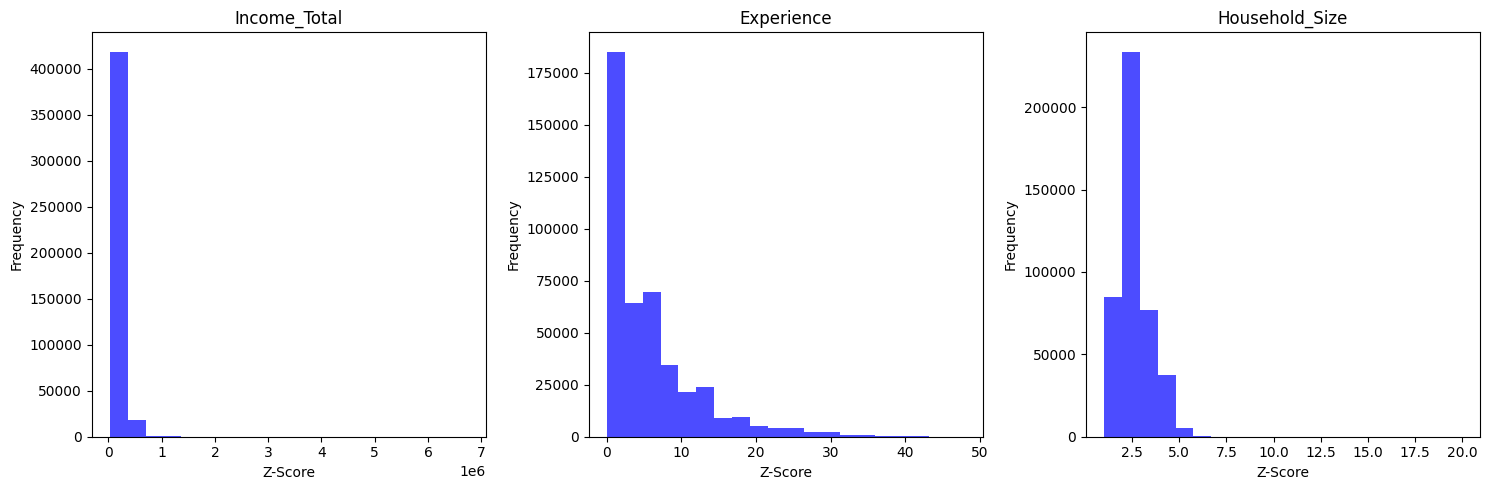

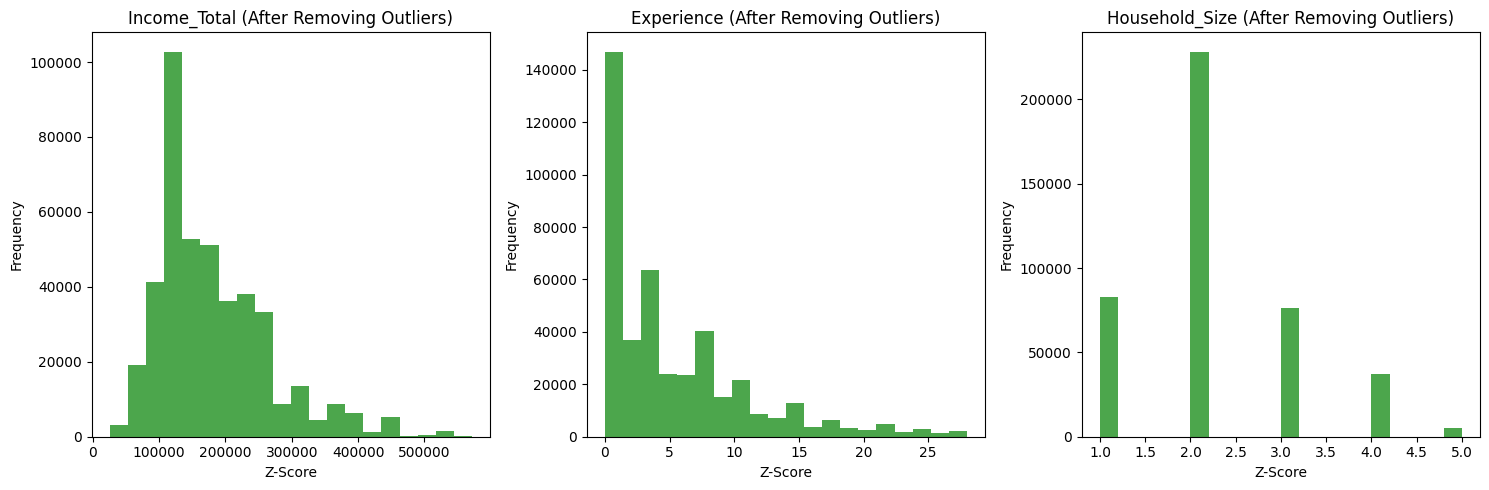

Index(['ID', 'Gender', 'Own_Car', 'Own_Realty', 'Income_Total', 'Own_Mobile',
       'Own_Work_Phone', 'Own_Phone', 'Own_Email', 'Family_Member_Count',
       'OPEN_MONTH', 'Household_Size', 'Age', 'Experience', 'Income_Source_0',
       'Income_Source_1', 'Education_Academic degree',
       'Education_Higher education', 'Education_secondary',
       'Family_Status_Married', 'Family_Status_Single',
       'Housing_Type_House / apartment', 'Housing_Type_With parents',
       'Income_Total_z_score', 'Experience_z_score', 'Household_Size_z_score'],
      dtype='object')

In [6]:
# Identifying and removing outliers with z-scores
def calculate_z_scores(df, cols):
    for col in cols:
        df[col + "_z_score"] = (df[col] - df[col].mean()) / df[col].std()
    return df

z_score_columns = ["Income_Total", "Experience", "Household_Size"]
master_data = calculate_z_scores(df=master_data, cols=z_score_columns)

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=len(z_score_columns), figsize=(15, 5))

# Plot histograms for z-scores
for i, col in enumerate(z_score_columns):
    axes[i].hist(master_data[col], bins=20, color='blue', alpha=0.7)
    axes[i].set_title(col)
    axes[i].set_xlabel("Z-Score")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Remove outliers
outliers = (master_data["Household_Size_z_score"].abs() <= 3.5) & \
                  (master_data["Experience_z_score"].abs() <= 3.5) & \
                  (master_data["Income_Total_z_score"].abs() <= 3.5)
master_data = master_data[outliers]

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=len(z_score_columns), figsize=(15, 5))

# Plot histograms for z-scores in the filtered dataset
for i, col in enumerate(z_score_columns):
    axes[i].hist(master_data[col], bins=20, color='green', alpha=0.7)
    axes[i].set_title(f"{col} (After Removing Outliers)")
    axes[i].set_xlabel("Z-Score")
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

master_data.columns

In [7]:
# Creating a pivot table and counting the number of past due
grouped = record.groupby('ID')
pivot_tb = record.pivot(index='ID', columns='MONTHS_BALANCE', values='STATUS')
pivot_tb['open_month'] = grouped['MONTHS_BALANCE'].min()
pivot_tb['end_month'] = grouped['MONTHS_BALANCE'].max()
pivot_tb['window'] = pivot_tb['end_month'] - pivot_tb['open_month'] + 1

pivot_tb

# X represents no outstanding loans

MONTHS_BALANCE,-60,-59,-58,-57,-56,-55,-54,-53,-52,-51,...,-6,-5,-4,-3,-2,-1,0,open_month,end_month,window
ID,,,,,,,,,,,,,,,,,,,,,
5001711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,X,-3,0,4
5001712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C,C,C,C,C,C,C,-18,0,19
5001713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,-21,0,22
5001714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,-14,0,15
5001715,NaN,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,-59,0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5150482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-28,-11,18
5150483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,X,X,X,X,X,X,X,-17,0,18
5150484,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,C,-12,0,13


In [13]:
# Count number of past dues, paid-offs, and no loans
# 61 is the number of columns (0 to 60 is being used)
# iloc is used for locating data i.e. .iloc[row_selection, column_selection]
# Interpretation of past due numbers are from Kaggle Dataset from the credit_record data. i.e. past due 2 means overdue by 90-119 days, C means paid off loan for that month
past_due_count = ['0', '1', '2', '3', '4', '5']
for number in past_due_count:
    pivot_tb[f'pastdue_{number}'] = pivot_tb[pivot_tb.iloc[:, 0:61] == number].count(axis=1)
    pivot_tb['no_loan'] = pivot_tb[pivot_tb.iloc[:, 0:61] == 'X'].count(axis=1)

# merge it into the master dataset and set it to a new table for ml
past_due_info = pivot_tb[['open_month', 'pastdue_0', 'pastdue_1', 'pastdue_2', 'pastdue_3', 'pastdue_4', 'pastdue_5', 'no_loan']]
customer_data = master_data.merge(past_due_info, how='inner', on='ID')

customer_data

,ID,Gender,Own_Car,Own_Realty,Income_Total,Own_Mobile,Own_Work_Phone,Own_Phone,Own_Email,Family_Member_Count,...,Experience_z_score,Household_Size_z_score,open_month,pastdue_0,pastdue_1,pastdue_2,pastdue_3,pastdue_4,pastdue_5,no_loan
0,5008804,1,1,1,427500.0,1,1,0,0,2.0,...,0.994928,-0.216585,-15,1,1,0,0,0,0,1
1,5008805,1,1,1,427500.0,1,1,0,0,2.0,...,0.994928,-0.216585,-14,1,1,0,0,0,0,1
2,5008806,1,1,1,112500.0,1,0,0,0,2.0,...,-0.390383,-0.216585,-29,7,0,0,0,0,0,16
3,5008808,0,0,1,270000.0,1,0,1,1,1.0,...,0.379234,-1.330947,-4,2,0,0,0,0,0,3
4,5008809,0,0,1,270000.0,1,0,1,1,1.0,...,0.379234,-1.330947,-26,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35646,5149828,1,1,1,315000.0,1,0,0,0,2.0,...,0.071387,-0.216585,-11,0,0,0,0,1,3,8
35647,5149834,0,0,1,157500.0,1,0,1,1,2.0,...,-0.390383,-0.216585,-23,1,7,2,1,1,7,0
35648,5149838,0,0,1,157500.0,1,0,1,1,2.0,...,-0.390383,-0.216585,-32,1,7,2,1,1,7,0
35649,5150049,0,0,1,283500.0,1,0,0,0,2.0,...,-0.698230,-0.216585,-9,8,1,1,0,0,0,0


In [14]:
# Creating a column to categorize customers in regards to past dues labeled target
customer_data['target'] = (customer_data['pastdue_2'] > 0) | (customer_data['pastdue_3'] > 0) | (customer_data['pastdue_4'] > 0) | (customer_data['pastdue_5'] > 0)
customer_data['target'] = customer_data['target'].astype(int)

# features to put into model
features = ["Income_Total", "Experience", "Family_Status_Married", "Family_Member_Count", "open_month", 
                     "Own_Car", "Age", "Gender", "Own_Realty", "Household_Size", "Education_Higher education"]

# Split data into training and testing sets
X = customer_data[features]
y = customer_data["target"]
customer_data

,ID,Gender,Own_Car,Own_Realty,Income_Total,Own_Mobile,Own_Work_Phone,Own_Phone,Own_Email,Family_Member_Count,...,Household_Size_z_score,open_month,pastdue_0,pastdue_1,pastdue_2,pastdue_3,pastdue_4,pastdue_5,no_loan,target
0,5008804,1,1,1,427500.0,1,1,0,0,2.0,...,-0.216585,-15,1,1,0,0,0,0,1,0
1,5008805,1,1,1,427500.0,1,1,0,0,2.0,...,-0.216585,-14,1,1,0,0,0,0,1,0
2,5008806,1,1,1,112500.0,1,0,0,0,2.0,...,-0.216585,-29,7,0,0,0,0,0,16,0
3,5008808,0,0,1,270000.0,1,0,1,1,1.0,...,-1.330947,-4,2,0,0,0,0,0,3,0
4,5008809,0,0,1,270000.0,1,0,1,1,1.0,...,-1.330947,-26,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35646,5149828,1,1,1,315000.0,1,0,0,0,2.0,...,-0.216585,-11,0,0,0,0,1,3,8,1
35647,5149834,0,0,1,157500.0,1,0,1,1,2.0,...,-0.216585,-23,1,7,2,1,1,7,0,1
35648,5149838,0,0,1,157500.0,1,0,1,1,2.0,...,-0.216585,-32,1,7,2,1,1,7,0,1
35649,5150049,0,0,1,283500.0,1,0,0,0,2.0,...,-0.216585,-9,8,1,1,0,0,0,0,1


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.2)

# Since there were NaNs in the data and RandomForest doesn't line NaNs, the SimpleImputer is used (fills NaNs with average)
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)

# Transform X_train and X_test using the same imputer for consistancy
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Create DataFrames from the transformed sets
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Standardize features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

# Random Forest classifier
rf_classifier = RandomForestClassifier()

# Feeding data to classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test data
y_predict = rf_classifier.predict(X_test)

# Print results
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict, average='weighted'))
print("F1 Score:", f1_score(y_test, y_predict, average='weighted'))

Accuracy: 0.9814892721918385
Precision: 0.9727304081532101
F1 Score: 0.9756288009524381


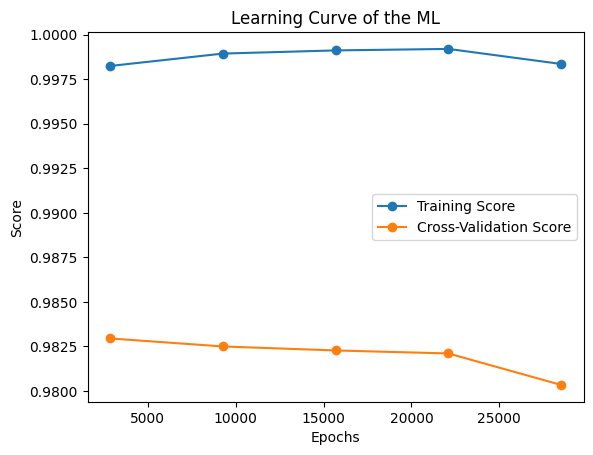

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Function to plot learning curve
def plotCurve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure()
    plt.title("Learning Curve of the ML")
    plt.xlabel("Epochs")
    plt.ylabel("Score")

    plt.plot(train_sizes, train_scores_mean, 'o-', label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-Validation Score")

    plt.legend()
    plt.show()

# Call function to plot curve
plotCurve(rf_classifier, X, y, cv=5)

Accuracy: 0.9814892721918385
Precision: 0.9727304081532101
F1 Score: 0.9756288009524381

Confusion Matrix:
[[6990   18]
 [ 114    9]]


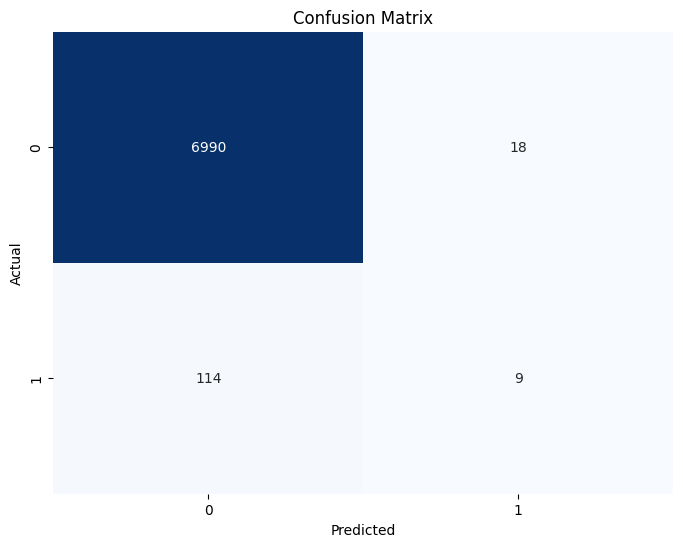

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predict)

print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict, average='weighted'))
print("F1 Score:", f1_score(y_test, y_predict, average='weighted'))
print("Confusion Matrix:")
print(conf_matrix)

# Plot the matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()